**Описание проекта**

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны данные о продажах игр, оценки пользователей и критиков, жанры и платформы.

**Цели проекта**

Найти закономерности успешности игр, что позволит спрогнозировать потенциально популярный продукт и спланировать рекламные кампании.

**Задачи**

- изучить общую информацию о предоставленных для анализа данных
- выполнить предобработку данных
- провести исследовательский анализ данных
- составить портрет пользователя каждого региона
- проверить гипотезы
- сформулировать общий вывод

### Изученние данных


Описание данных:

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except FileNotFoundError:
    data = pd.read_csv(r'C:\Users\ASUS\Desktop\Практикум\Data\games.csv')

In [3]:
data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Подготовка данных

In [5]:
# Приводим имена столбцов к нижнему регистру
data.columns = data.columns.str.lower()

#### Проверим на наличие дубликатов

In [6]:
data.duplicated().sum()

0

In [7]:
dupl = data.loc[:, 'name':'platform']
dupl.duplicated().sum()

5

In [8]:
dupl[dupl.duplicated()]

,name,platform
1591,Need for Speed: Most Wanted,X360
4127,Sonic the Hedgehog,PS3
11715,Need for Speed: Most Wanted,PC
14244,NaN,GEN
16230,Madden NFL 13,PS3


In [9]:
data.query('name == "Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Тут две разные игры имеют одинаковое название, оставим как есть

In [10]:
data.query('name == "Sonic the Hedgehog"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
257,Sonic the Hedgehog,GEN,1991.0,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
1996,Sonic the Hedgehog,X360,2006.0,Platform,0.44,0.48,0.00,0.11,46.0,4.4,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


In [11]:
data.loc[1745, 'eu_sales'] = data.loc[4127, 'eu_sales'] + data.loc[1745, 'eu_sales']

Похоже на ту же игру для европейского рынка, объеденим строки и удалим дубликат.

In [12]:
data.drop(4127, inplace = True)

In [13]:
data.query('name == "Madden NFL 13"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Тут явно дубликат

In [14]:
data.drop(16230, inplace = True)

#### Рассмотрим пропуски в датафрейме

In [15]:
data.isna().sum()

name                  2
platform              0
year_of_release     268
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [16]:
data[data['name'].isna()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [17]:
data = data.dropna(subset = ['name'])
# Удалим пропуски так как эти строчки не влияют на датафрейм, а также являются дубликатом

In [18]:
data['genre'].isna().sum()
# Пропуски в жанре удалитлись вместе с пропусками в названии

0

In [19]:
data['year_of_release'] = data.groupby('platform')['year_of_release'].apply(lambda x: x.fillna(x.median()))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_29376\90793798.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data['year_of_release'] = data.groupby('platform')['year_of_release'].apply(lambda x: x.fillna(x.median()))


Пропуски в датафрейме могут возникать по разным причинам, например, если данные не были собраны или были утеряны.Пропуски в столбце ‘year_of_release’ могут возникать, если год выпуска игры не был указан или был указан неверно.
Заполним пропуск медианным занчением по платформе, так как платформы сменяются циклично каждые 5-8 лет

In [20]:
# Заменим пропуски в дате выпуска на 0 и приведем к типу данных INT
data['year_of_release'] = data['year_of_release'].astype(int)

TBD - это аббревиатура фразы “To Be Determined” (будет определено). В контексте оценки игр это означает, что рейтинг игры еще не определен и будет добавлен позже.

In [21]:
# TBD (to be determined) = будет определено. Обработаем как пропуск
data.loc[data['user_score'] =='tbd','user_score'] = np.nan

In [22]:
# Поменяес тип данных с object на float
data['user_score']=data['user_score'].astype(float)

In [23]:
# Пропуски с оценками заменим на 0, так как на оценки могут влиять слишком много факторов
data['user_score']=data['user_score'].fillna(0)

In [24]:
data['critic_score']=data['critic_score'].fillna(0)

Пропуски в данных с оценкой могут быть связанны например с возратом игр или недостаточным количеством оценок 

In [25]:
#Заменим пропуски на «RP» («Rating Pending») — «Рейтинг ожидается»
data['rating'] = data['rating'].fillna('RP')

Пропуски в рейтинге скорее всего связанны с тем что ESRB северноамериканский рейтинг, тогда как в европе используют - PEGI ,а в Японии - CERO

In [26]:
# Рассчитаем суммарные продажи во всех регионах и добавим колонку в таблицу 
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Проверим датасает

In [27]:
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16711 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16711 non-null  object 
 1   platform         16711 non-null  object 
 2   year_of_release  16711 non-null  int32  
 3   genre            16711 non-null  object 
 4   na_sales         16711 non-null  float64
 5   eu_sales         16711 non-null  float64
 6   jp_sales         16711 non-null  float64
 7   other_sales      16711 non-null  float64
 8   critic_score     16711 non-null  float64
 9   user_score       16711 non-null  float64
 10  rating           16711 non-null  object 
 11  total_sales      16711 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


In [29]:
data.duplicated().sum()

0

#### Вывод по данным

В столбцах user_score и year_of_release изменили типы данных, добавили столбец с общими продажами и обработали пропуски.
Также были обработаны неявные дубликаты. 

### Исследовательский анализ данных

#### Анализ релизов игр по годам

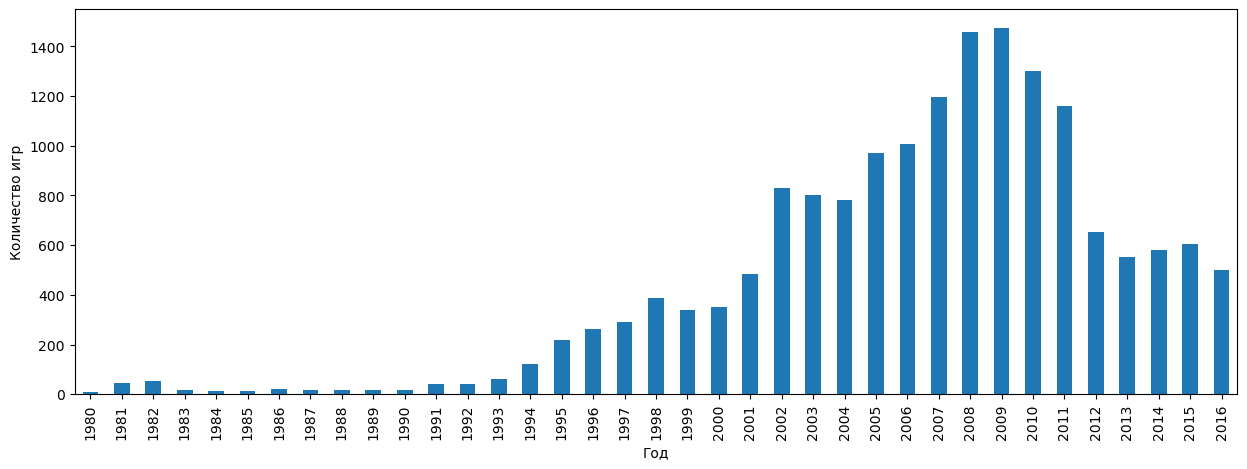

In [30]:
(
data.pivot_table(index='year_of_release', values='name', aggfunc='count')
.plot(ylabel = 'Количество игр',xlabel = 'Год' ,kind = 'bar',figsize = (15,5),legend=False)
);

Начиная с 1993 года прослеживается рост выпуска игр, который продолжается до 2008 года.В 2008 и 2009 годах было выпущено максимальное количество игр. После 2009 года выпуск игр начал уменьшаться.
Таким образом, количество игр выпущенных до 1993 года является несущественным, поэтому далее будем рассматривать данные, начиная с 1993 года.

In [31]:
data = data.query('year_of_release >= 1993').reset_index(drop=True)

#### Анализ релизов игр по платформам

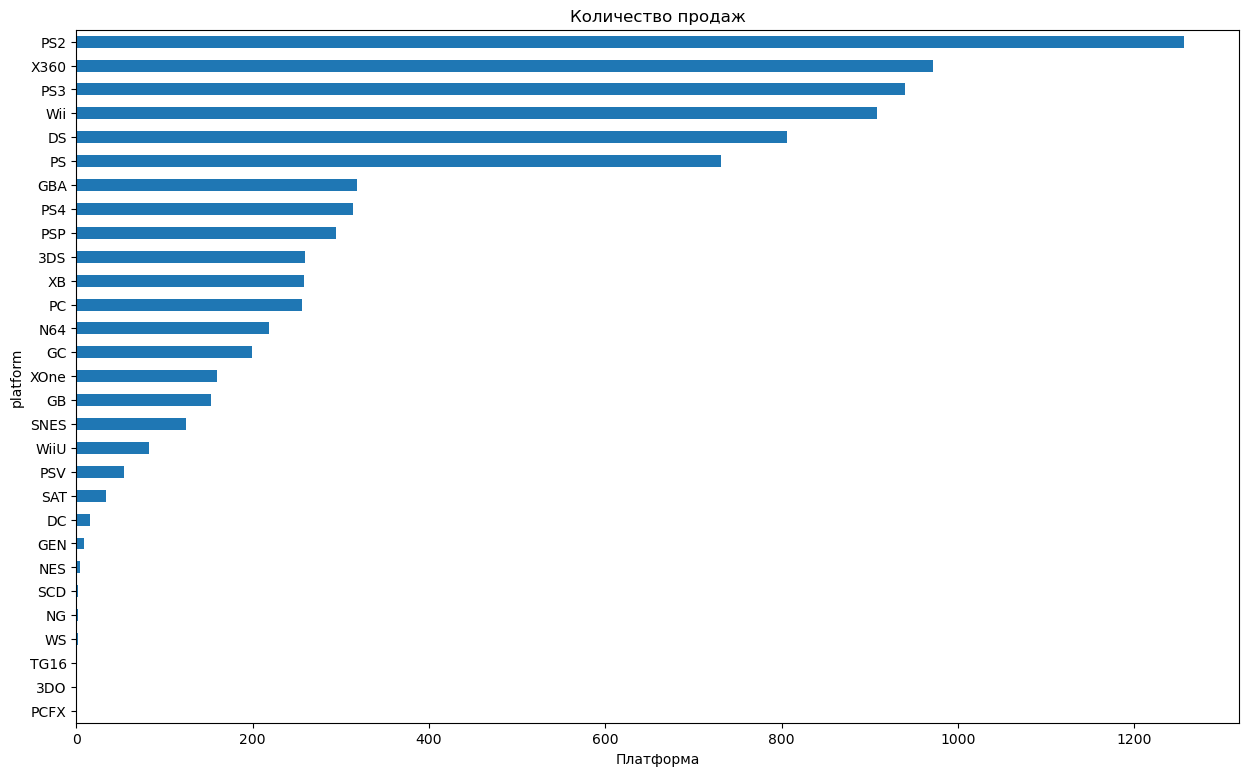

In [32]:
(
    data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales')
    .plot(kind='barh',legend=False, figsize=(15,9),title = 'Количество продаж',xlabel = 'Платформа')
);

Как мы видем в лидерах продаж находятся PS2, X360, PS3, Wii, DS и PS.

В топах продаж 5 из 6 игровых платформ из Японии и только Xbox 360 из США

In [33]:
highest_sales_platforms = list(data
                               .pivot_table(index='platform', values='total_sales', aggfunc='sum')
                               .sort_values(by='total_sales', ascending=False)
                               .index[:6]
                              )             

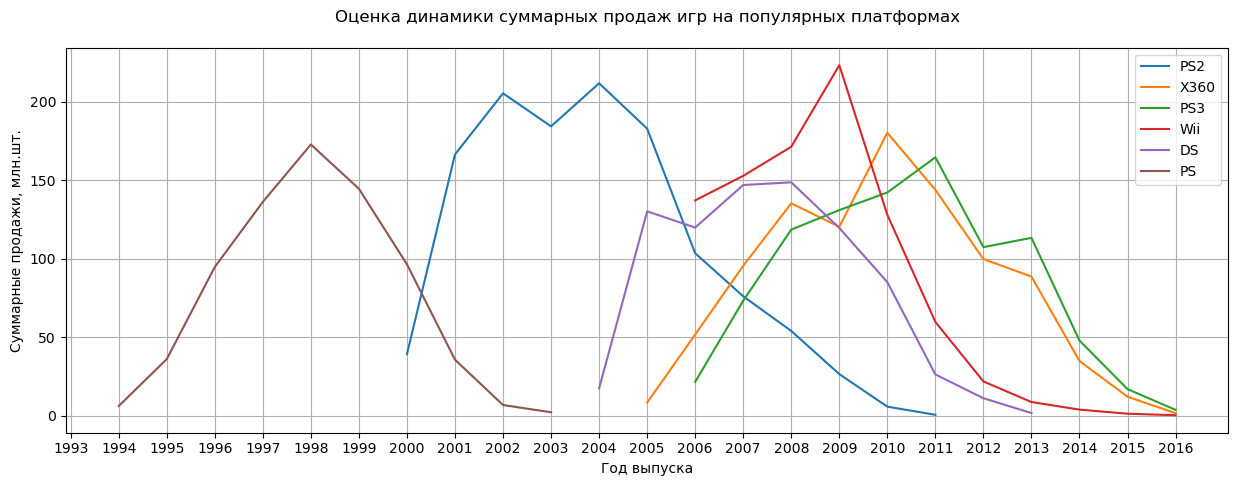

In [34]:
fig, ax = plt.subplots(figsize=(15,5))
for platform in highest_sales_platforms:
    (
        data
        .query('platform == @platform')
        .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
        .plot(y='total_sales', kind='line', label=platform, style='-', grid=True, ax=ax)
    )
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи, млн.шт.')
plt.title('Оценка динамики суммарных продаж игр на популярных платформах\n')
plt.xticks([i for i in range(1993, 2017)]); 

Среднее время поддержки игр на платформе 9-10 лет. В топе продаж у нас есть 3 поколения приставки PlayStation и как можно наблюдать на графике новое поколение выходит каждые 6-7 лет (PlayStation 4 вышла в 2013 году) и продажа игр идет еще 2-3 года.

PS3, X360 и Wii, являются платформами седьмого поколения, которые к 2017 году уже исчерпали себя. Поэтому для нас актуальными являются платформы 8 поколения, которое берет свое начало после выхода в 2011 году портативной консоли Nintendo 3DS.

Достижение пика продаж занимает 3-4 года от выхода новой платформы, актуальным периодом можно считать период с 2014 по 2016 год. Однако данные за 2016 год могут быть неполными.

In [35]:
# Создадим датафрейм за актуальный период
df = data.query('year_of_release >= 2014').reset_index(drop=True)

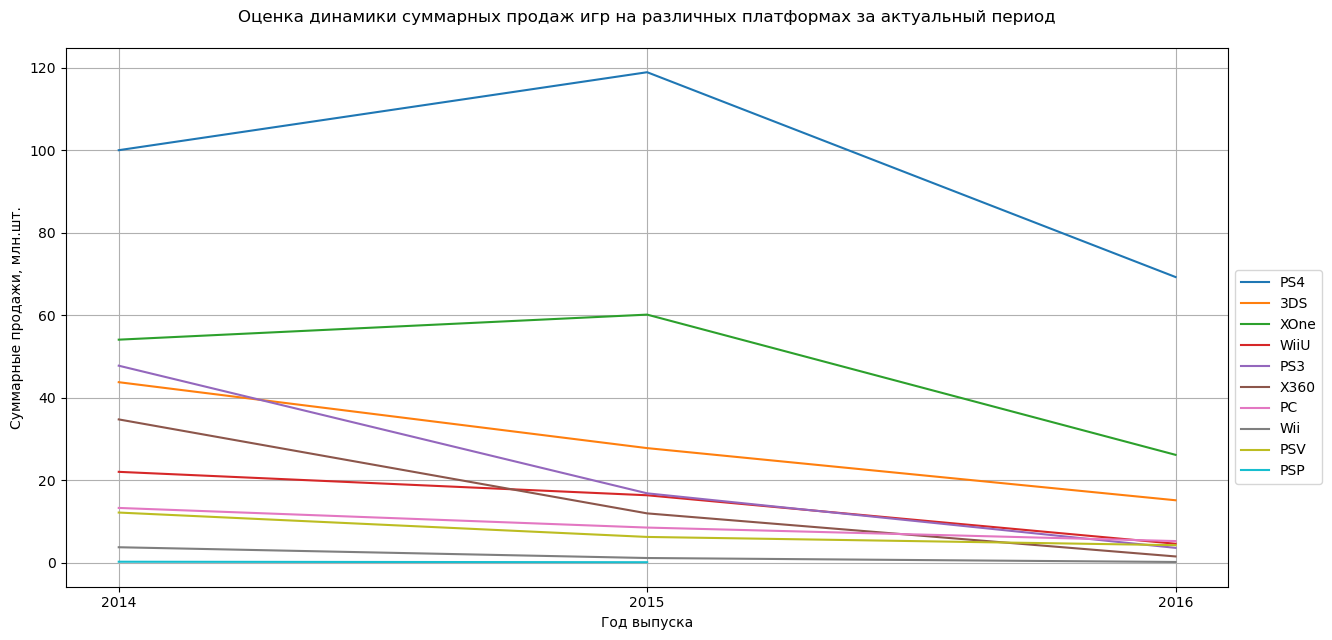

In [36]:
fig, ax = plt.subplots(figsize=(15,7))
for platform in df.platform.unique():
    (
        df
        .query('platform == @platform')
        .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
        .plot(y='total_sales',label=platform, grid=True, ax=ax)
    )
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи, млн.шт.')
plt.xticks([i for i in range(2014, 2017)])
plt.legend(bbox_to_anchor=(1, 0.6))
plt.title('Оценка динамики суммарных продаж игр на различных платформах за актуальный период\n');

Актульными платформами явлются PlayStation 4 и Xbox One, также можно отметить 2 консоли Nintendo (WiiU и 3DS)

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

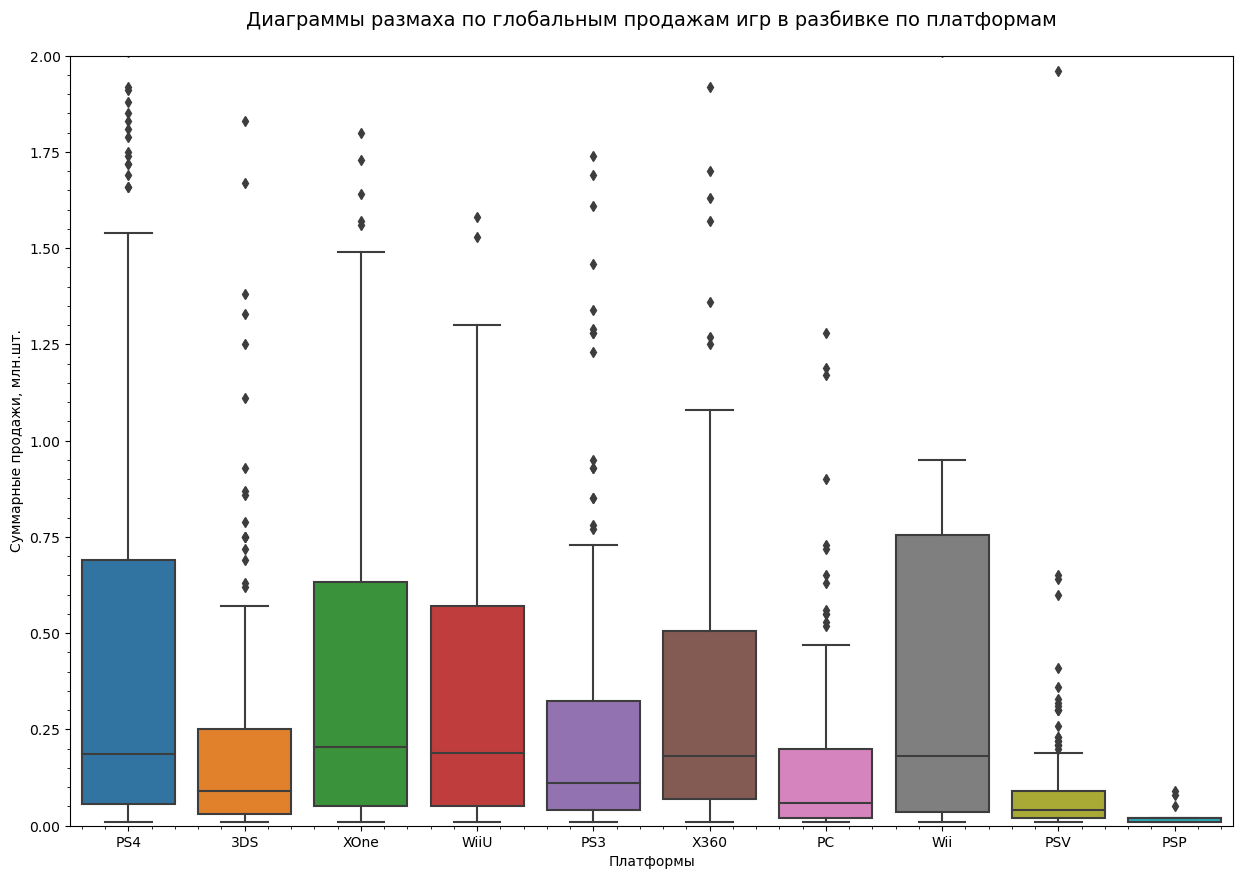

In [37]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, y='total_sales', x='platform')
plt.minorticks_on()
plt.ylabel('Суммарные продажи, млн.шт.')
plt.xlabel('Платформы')
plt.title('Диаграммы размаха по глобальным продажам игр в разбивке по платформам\n', fontsize=14)
plt.ylim(0, 2);

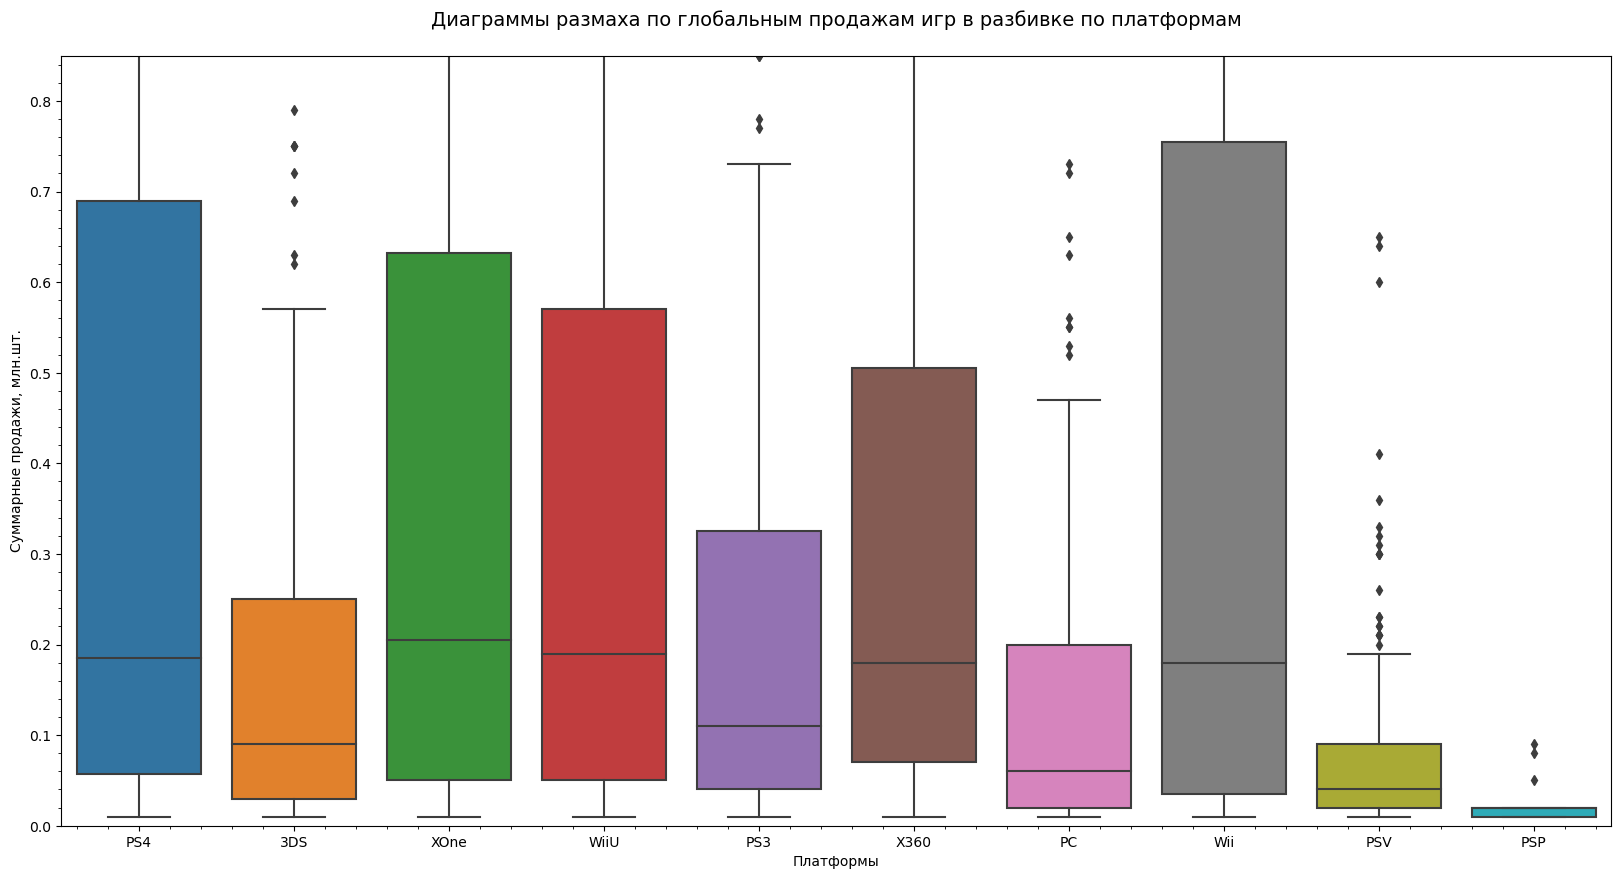

In [38]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df, y='total_sales', x='platform')
plt.minorticks_on()
plt.ylabel('Суммарные продажи, млн.шт.')
plt.xlabel('Платформы')
plt.title('Диаграммы размаха по глобальным продажам игр в разбивке по платформам\n', fontsize=14)
plt.ylim(0, 0.85);

Будем учитывать, что в этом срезе данных игр на платформах Wii гораздо меньше, чем на других платформах.

Суммарные продажи игр за рассматриваемый период на платформах XOne, PS4, WiiU и X360 более изменчивы, чем на остальных. Игры на платформах XOne, WiiU, X360 и PS4 более популярны, их медианные продажи составляют 0.20, 0.19, 0.18 и 0.18 млн.копий против 0.11, 0.09, 0.06 и 0.04 млн. копий для PS3, 3DS, PC и PSV соответственно.

Видно, что существуют выбросы на графиках у всех платформ, но это из-за того что у каждой из плотформ есть свои "хиты" с огромными рекламными компаниями.

Верхняя граница нормальных значений суммарных продаж у платформ XOne и PS4 находится в районе 1.5 млн. копий, у WiiU - 1.3 млн. копий, у X360 - 1.08 млн. копий.

In [39]:
#делаем срез по платформе "PlayStation 4"
ps4 = df.query('platform == "PS4"')[['critic_score','user_score','total_sales']]

In [40]:
ps4 = ps4[ps4['critic_score']!= 0]
ps4 = ps4[ps4['user_score']!= 0]

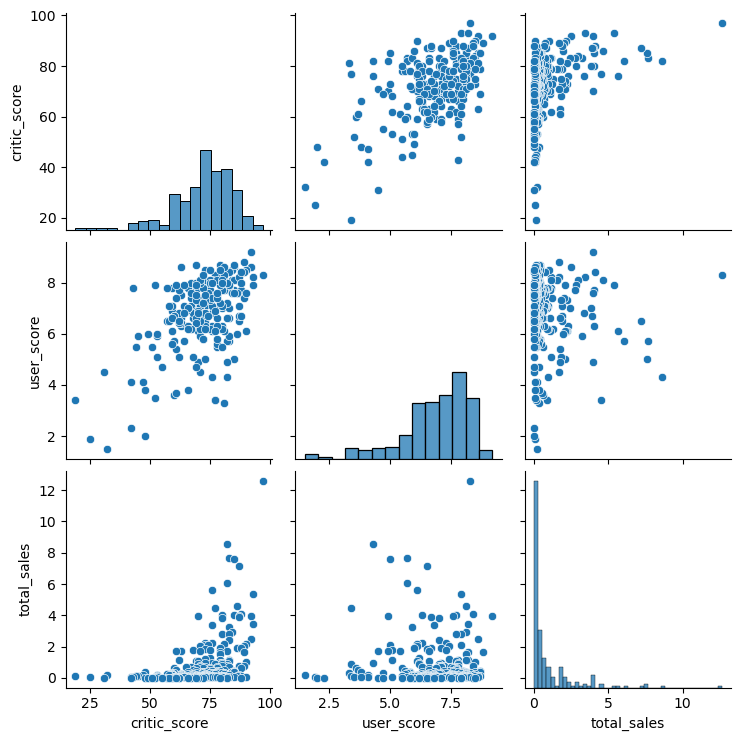

In [41]:
sns.pairplot(ps4)
plt.show()

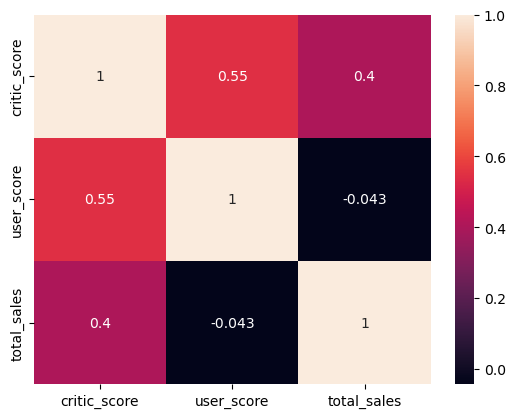

In [42]:
sns.heatmap(ps4.corr(),annot=True)
plt.show()

Видим несущественную корреляцию между продажами и оценками критиков, однако она слишком маленькая

Сравним с главным конкурентом Xbox One и ПК как некой нейтральной игровой платформой.

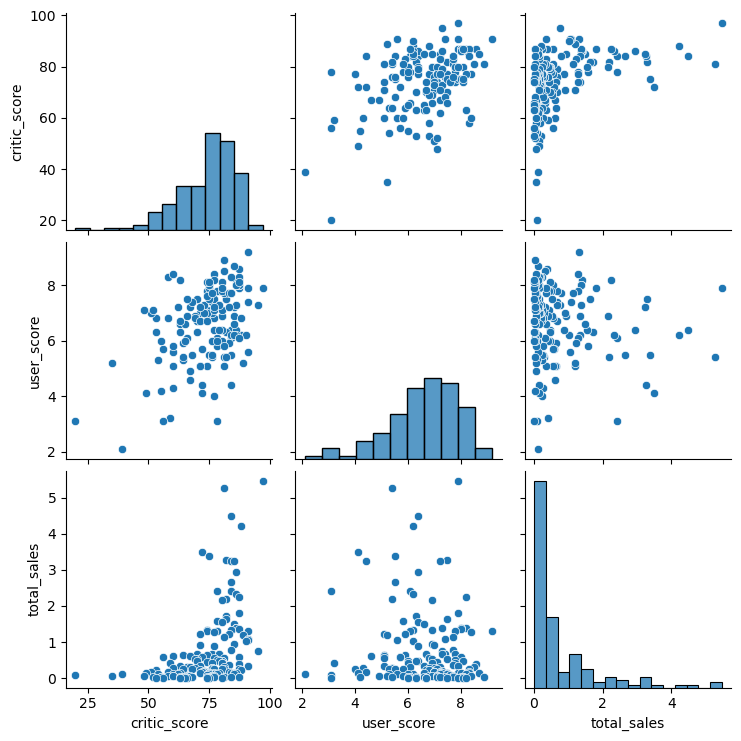

In [43]:
xone = df.query('platform == "XOne"')[['critic_score','user_score','total_sales']]
xone = xone[xone['critic_score'] != 0]
xone = xone[xone['user_score'] != 0]
sns.pairplot(xone)
plt.show()

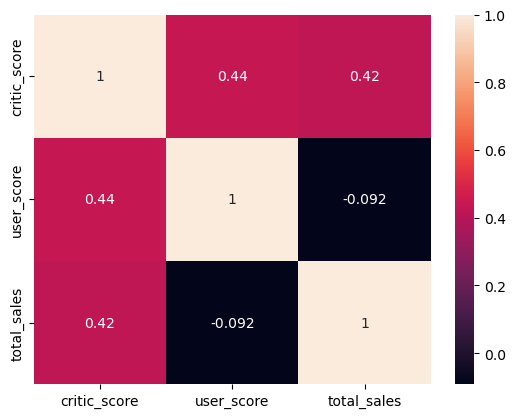

In [44]:
sns.heatmap(xone.corr(),annot=True)
plt.show()

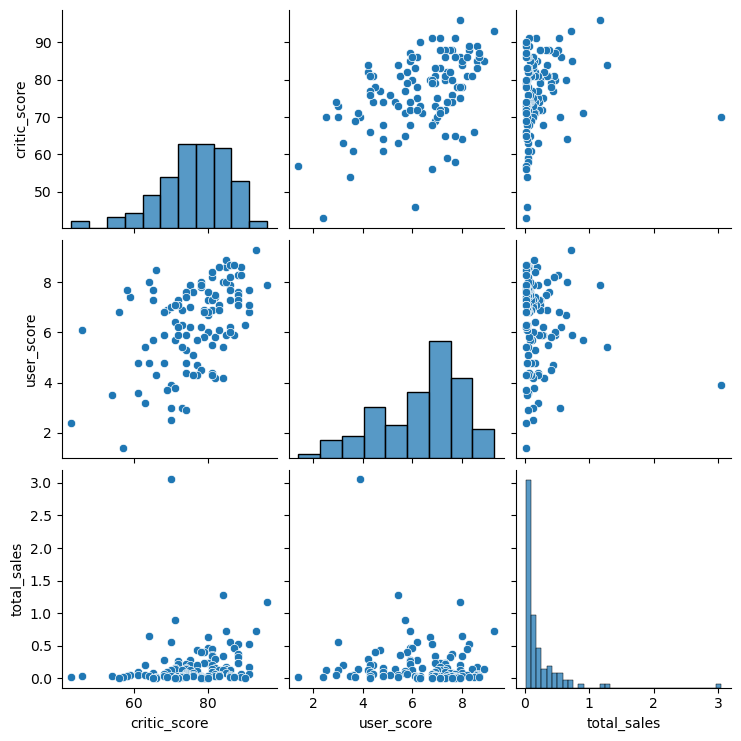

In [45]:
pc = df.query('platform == "PC"')[['critic_score','user_score','total_sales']]
pc = pc[pc['critic_score'] != 0]
pc = pc[pc['user_score'] != 0]
sns.pairplot(pc)
plt.show()

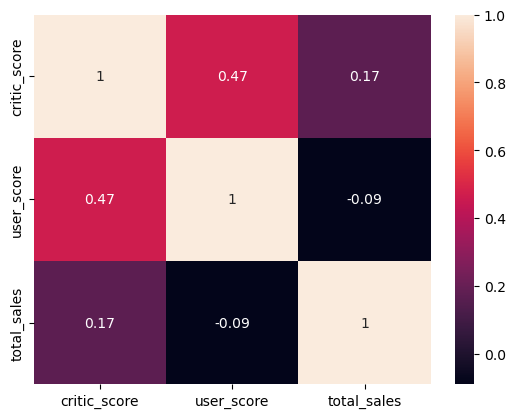

In [46]:
sns.heatmap(pc.corr(),annot=True)
plt.show()

Существенной корреляции с рейтингом не наблюдается

Посмотрим выделяются ли жанры с высокими и низкими продажами за актуальный период.

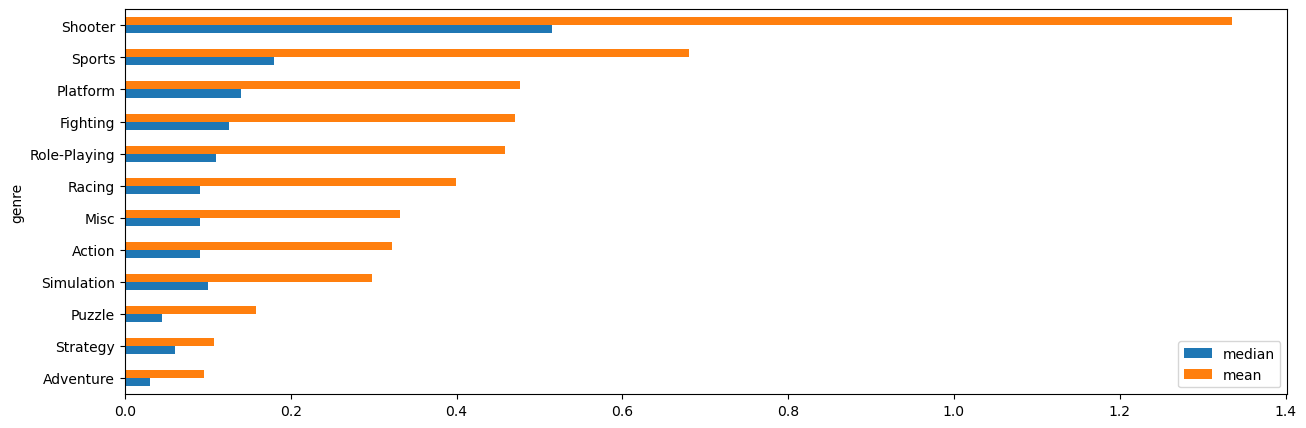

In [47]:
(
    df.groupby('genre')['total_sales']
    .agg(['median','mean']).sort_values(by='mean')
    .plot(kind='barh', xlabel='',figsize = (15,5))
);

Самым популярным жанром является Шутер а так же Спорт и Платформеры. Нишевые жанры: Пазлы, стратегии и приключения.

Количество выпускаемых игр не всегда связано с успешностью продаж.

#### Составление портрета пользователя по каждому региону

Проанализируем 3 региона:
* NA  -  Северная Америка
* EU  -  Европа
* JP  -  Япония

In [48]:
display\
(df.pivot_table(index='platform', values=['na_sales','eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum')\
 .sort_values(by=['na_sales','eu_sales', 'jp_sales', 'other_sales'], ascending=False).head(11))

,eu_sales,jp_sales,na_sales,other_sales
platform,,,,
PS4,130.04,15.02,98.61,44.48
XOne,46.25,0.32,81.27,12.52
X360,15.49,0.08,28.30,4.35
3DS,16.12,44.24,22.64,3.68
PS3,25.54,11.22,22.05,9.37
WiiU,13.15,7.31,19.36,3.16
PC,17.97,0.00,7.23,1.85
PSV,3.58,14.61,2.63,1.84
Wii,2.59,0.00,2.08,0.40


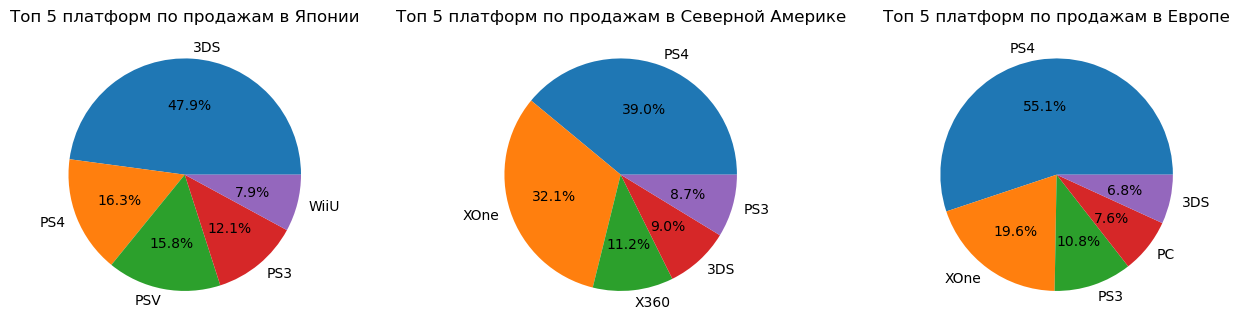

In [49]:
fig, axs = plt.subplots(1, 3,figsize = (15,5))
df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)[:5].plot(kind='pie',y="% sales",ylabel='',autopct='%1.1f%%', ax=axs[0])
df.groupby('platform')['na_sales'].sum().sort_values(ascending=False)[:5].plot(kind='pie',y="% sales",ylabel='',autopct='%1.1f%%', ax=axs[1])
df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)[:5].plot(kind='pie',y="% sales",ylabel='',autopct='%1.1f%%', ax=axs[2])
plt.subplots_adjust(wspace=0.5)
axs[0].set_title('Топ 5 платформ по продажам в Японии')
axs[1].set_title('Топ 5 платформ по продажам в Северной Америке')
axs[2].set_title('Топ 5 платформ по продажам в Европе');

На Японском рынке доминируют платформы собственого производста, а так же большую долю составляют портативные консоли. В европе и севернй америке большую часть рынка занимает PS4, однако в америке в отличие от европы родная 'Microsoft' конкурирует с япнскими платформами

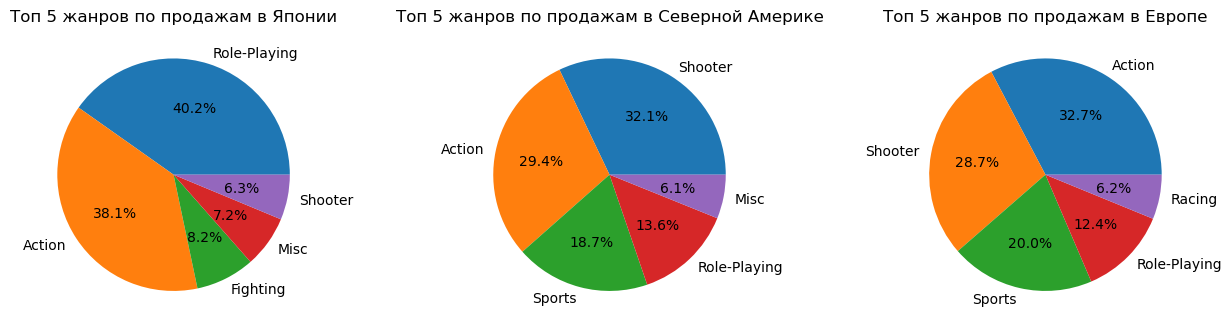

In [50]:
fig, axs = plt.subplots(1, 3,figsize = (15,5))
df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)[:5].plot(kind='pie',y="% sales",ylabel='',autopct='%1.1f%%', ax=axs[0])
df.groupby('genre')['na_sales'].sum().sort_values(ascending=False)[:5].plot(kind='pie',y="% sales",ylabel='',autopct='%1.1f%%', ax=axs[1])
df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)[:5].plot(kind='pie',y="% sales",ylabel='',autopct='%1.1f%%', ax=axs[2])
plt.subplots_adjust(wspace=0.5)
axs[0].set_title('Топ 5 жанров по продажам в Японии')
axs[1].set_title('Топ 5 жанров по продажам в Северной Америке')
axs[2].set_title('Топ 5 жанров по продажам в Европе');

Европа и Северная Америка не сильно оличаются по жанрам (Экшн, Шутер и Спорт).в В Японии большую часть рынка занимают Ролевые Игры

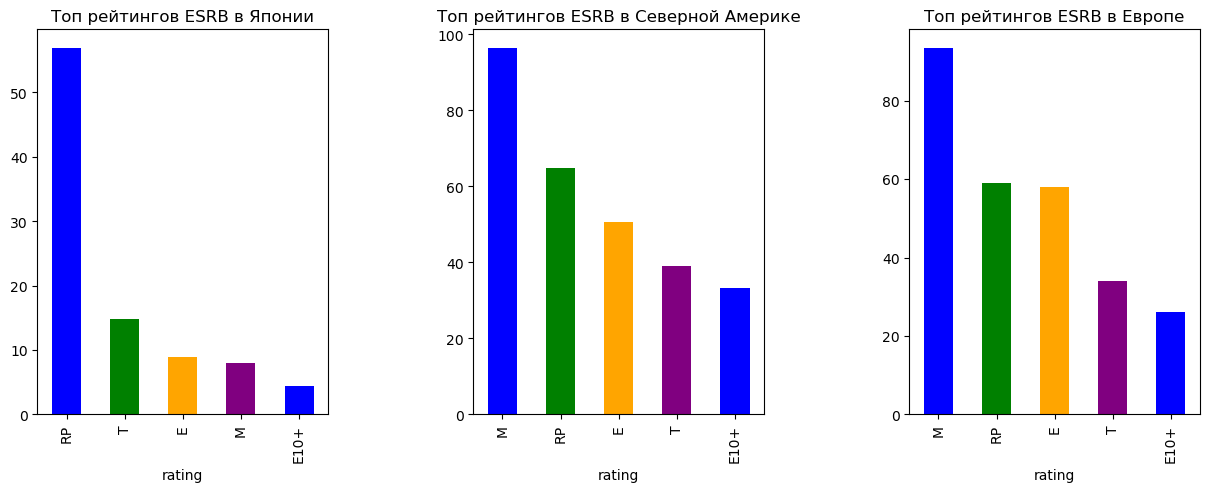

In [51]:
fig, axs = plt.subplots(1, 3,figsize = (15,5))
df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)[:5].plot(kind='bar', ax=axs[0], color=['blue', 'green', 'orange', 'purple'])
df.groupby('rating')['na_sales'].sum().sort_values(ascending=False)[:5].plot(kind='bar', ax=axs[1], color=['blue', 'green', 'orange', 'purple'])
df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)[:5].plot(kind='bar', ax=axs[2], color=['blue', 'green', 'orange', 'purple'])
plt.subplots_adjust(wspace=0.5)
axs[0].set_title('Топ рейтингов ESRB в Японии')
axs[1].set_title('Топ рейтингов ESRB в Северной Америке')
axs[2].set_title('Топ рейтингов ESRB в Европе');

Европа и Северная Америка предподчитают более взрослый контент, в Японии же доминируют игры без рейтинга ESRB и игры для подростков. Такое количество игр без рейтинга в Японии скорее всего связанно с тем что в японии рейтинговая система CERO

### Проверка гипотез

#### Гипотеза о средних пользовательских рейтингах платформ XOne и PC

Сформулируем нулевую и альтернативную гипотезы:

Н0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые,
Н1: средние пользовательские рейтинги платформ Xbox One и PC разные.
Для проверки гипотезы о равенстве средних двух генеральных совокупностей будем использовать t-тест

In [52]:
data_xone=df.query('platform == "XOne" and user_score != 0')['user_score'].dropna()
data_pc=df.query('platform == "PC" and user_score != 0')['user_score'].dropna()

print("\nРазмер выборки по Xbox One:", len(data_xone))
print("Размер выборки по PC:", len(data_pc), "\n\n")

alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(data_xone, data_pc, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу\n")
else:
    print("Не получилось отвергнуть нулевую гипотезу\n") 


Размер выборки по Xbox One: 165
Размер выборки по PC: 122 


p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу



Таким образом, разница между средними пользовательскими рейтингами платформ Xbox One и PC статичтически незначима, при уровне значимости 5%. Поэтому предположение о равенстве средних рейтингов считаем верным.

#### Гипотеза о средних пользовательских рейтингах жанров Action и Sports

Сформулируем нулевую и альтернативную гипотезы:

Н0: средние пользовательские рейтинги жанров Action и Sports одинаковые,
Н1: средние пользовательские рейтинги жанров Action и Sports разные.

In [53]:
data_action=df.query('genre == "Action" and user_score != 0')['user_score'].dropna()
data_sports=df.query('genre == "Sports" and user_score != 0')['user_score'].dropna()

print("\nРазмер выборки по жанру Action:", len(data_action))
print("Размер выборки по жанру Sports:", len(data_sports), "\n\n")

alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(data_action, data_sports, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу\n")
else:
    print("Не получилось отвергнуть нулевую гипотезу\n") 


Размер выборки по жанру Action: 297
Размер выборки по жанру Sports: 127 


p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу



Таким образом, при условии, что нулевая гипотеза верна, вероятность получить наблюдаемый результат очень мала, при уровне значимости 5%. Поэтому предположение о том, что средние пользовательские рейтинги жанров Action и Sports разные, верно.

### Общий вывод

Было проведено исследование, чтобы выявить интересные особенности и закономерности, которые существуют на рынке компьютерных игр. Входные данные – исторические данные до 2016 года из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы.

Обзор исходных данных показал, что таблица состоит из 16715 записей о выпущенных играх, описываемых 11 признаками с различными типами данных. Были обработаны пропущенные значения и изменены типы данных там, где это необходимо.

В датафрейм был добавлен новый столбец с суммарными продажами во всех странах, т.к. это требовалось для последующего анализа. Проведя анализ, выявлено, что количество выпущенных игр на приставках и ПК начало расти с начала 90х до 2008 года. Пик выпуска игр приходится на 2008-2009 годы, после которого прослеживается спад, возможно, связанный с развитием мобильных платформ и социальных сетей. За весь период (начиная с 1993 года) популярными оказались следующие платформы - PS2, X360, PS3, Wii, DS и PS. Характерный срок использования платформы составляет в среднем 10 лет, а время достижения пика продаж с момента выхода новой платформы - 3-4 года. В связи с этим в качестве актуального периода был выбран период с 2014 по 2016 год. 

За актуальных период потенциально прибыльными оказались платформы 8-го поколения - PS4, XOne, 3DS и WiiU. Если рассматривать суммарные продажи игр, то игры на платфомах XOne, WiiU, X360 и PS4 более популярны. Но у всех платформ есть выбивающиеся более популярные игры, вносящие большой вклад в среднее значение продаж.

Самые популярные жанры игр у пользователей - Action, Shooter, Sports. В отстающих находятся - Adventure, Simulation, Strategy и Puzzle.

Для покупателей из Японии следует делать акцент на игры для японских консолей, в том числе и портативных. А так же продвигать игры жанра Ролевая Игра и Экшн

Портреты пользователей из Северной Америки и Европы схожи. Стоит обратит внимание на жанры Шутер, Экшн и Спорт с жанром «M» («Mature») — «Для взрослых»(для лиц от 17 лет)

Наиболее перспективная консоль PlayStation4, В Японии все еще популярна Nintendo 3DS, однако ее жиненый цикл подходит к концу. в В Северной Америки конкуренцию PlayStation4 сосотвлят Xbox One, на котрый скорее всего обновятся большенство пользователей Xbox 360.

Для японского сайта интернет-магазина стоит использовать рейтинговую ситстему CERO, а для европейского PEGI.